In [1]:
import numpy as np
import pickle
from utils import derive_overall_recall_rate

In [ ]:
candidate_segments = np.array([[2, 5], [16, 17]])
ground_truth_segments = np.array([[1, 10], [15, 20]])

tIoU_thresh = 0.3
recall_rate, recalled_count, ground_truth_num = derive_recall_rate(ground_truth_segments, candidate_segments, tIoU_thresh)
print(recall_rate)
print(recalled_count)
print(ground_truth_num)

In [2]:
def read_predicted_proposal():
    with open('../data/outputs/predicted_proposal.pkl', 'rb') as f:
        results = pickle.load(f)
        return results

results = read_predicted_proposal()
tIoU_thresh_values = np.linspace(0.0, 1.0, num=20)

total_recall_rates =[]
for tIoU_thresh in tIoU_thresh_values:
    total_recall_rate = derive_overall_recall_rate(tIoU_thresh, results)
    total_recall_rates.append(total_recall_rate)

# print(tIoU_thresh_values, total_recall_rates)

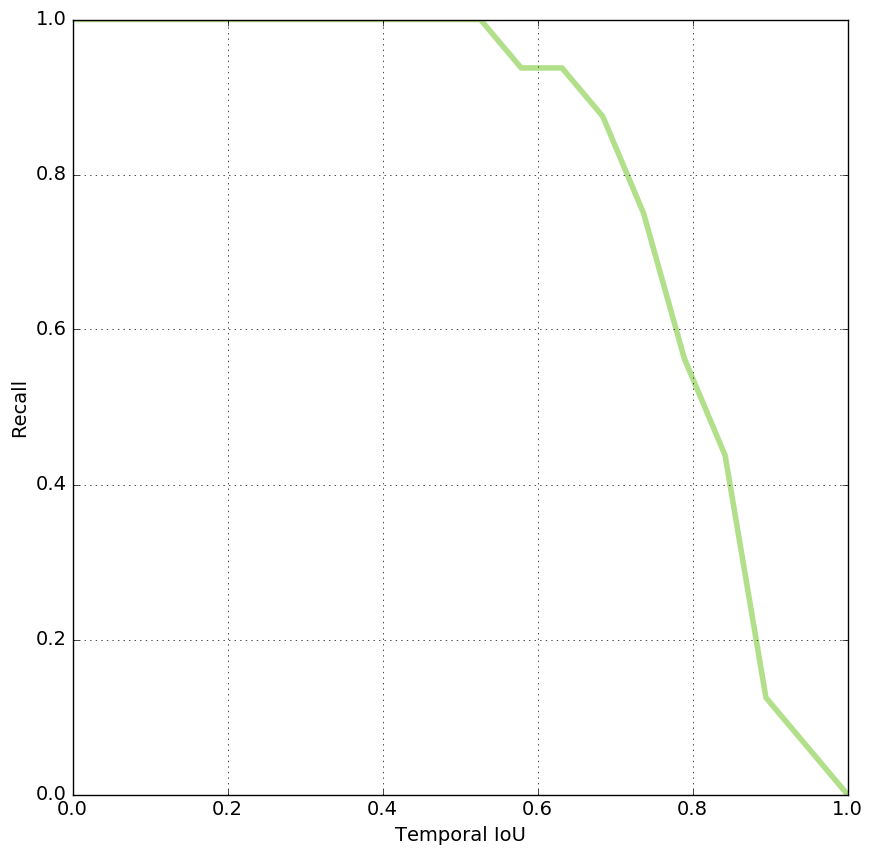

In [3]:
import matplotlib.pyplot as plt

fn_size = 14
plt.figure(num=None, figsize=(10, 10))
plt.plot(tIoU_thresh_values, total_recall_rates, linewidth=4, color=np.array([178,223,138])/255.0)
plt.xlabel('Temporal IoU', fontsize=fn_size)
plt.ylabel('Recall', fontsize=fn_size)
plt.grid(b=True, which="both")
plt.setp(plt.axes().get_xticklabels(), fontsize=fn_size)
plt.setp(plt.axes().get_yticklabels(), fontsize=fn_size)
plt.xlim([0, 1.0])
plt.show()

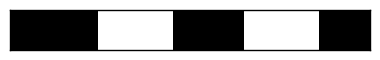

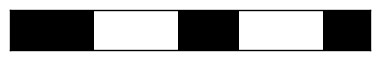

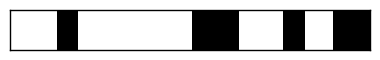

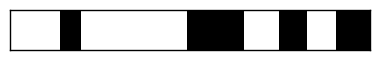

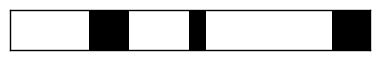

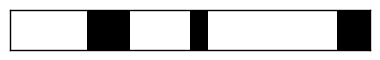

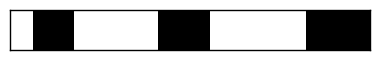

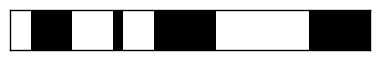

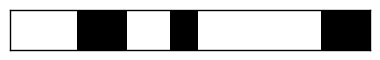

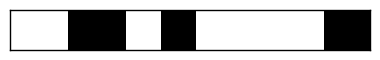

In [4]:
def generate_bars():
    for key in results:
        gt = np.array(results[key]['ground_truth'])
        pt = np.array(results[key]['predict'])
        gt_bar = np.zeros(gt[-1][-1])
        pt_bar = np.zeros(pt[-1][-1])
        for s, e in gt:
            gt_bar[s:e] = 1
        for s, e in pt:
            pt_bar[s:e] = 1
        yield gt_bar, pt_bar

axprops = dict(xticks=[], yticks=[])
barprops = dict(aspect='auto', cmap=plt.cm.binary, interpolation='nearest')

for gt_bar, pt_bar in generate_bars():
    fig = plt.figure()
    x = np.where(gt_bar == 1, 1.0, 0.0)
    x.shape = 1, len(x)
    ax = fig.add_axes([0.3, 0.1, 0.6, 0.1], **axprops)
    ax.imshow(x, **barprops)

    fig = plt.figure()
    x = np.where(pt_bar == 1, 1.0, 0.0)
    x.shape = 1, len(x)
    ax = fig.add_axes([0.3, 0.1, 0.6, 0.1], **axprops)
    ax.imshow(x, **barprops)

plt.show()